# Historical Series VaR

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
directory = 'C:/Users/ricar/Desktop/Directorio de R/ETF_prices.csv'

DB= pd.read_csv(directory)

print(DB)

        fund_symbol  price_date   open   high    low  close  adj_close  volume
0               AAA  2020-09-09  25.10  25.12  25.07  25.07      24.85   17300
1               AAA  2020-09-10  25.06  25.07  25.05  25.07      24.85   23500
2               AAA  2020-09-11  25.04  25.05  25.02  25.03      24.81   33400
3               AAA  2020-09-14  25.01  25.06  25.01  25.02      24.80   13100
4               AAA  2020-09-15  25.02  25.03  25.01  25.01      24.79   12100
...             ...         ...    ...    ...    ...    ...        ...     ...
3866025         ZSL  2021-11-23  26.81  27.21  26.30  26.35      26.35  190900
3866026         ZSL  2021-11-24  26.79  26.96  26.57  26.69      26.69  109000
3866027         ZSL  2021-11-26  26.67  28.14  26.67  27.72      27.72  205500
3866028         ZSL  2021-11-29  27.89  28.56  27.80  28.27      28.27  411900
3866029         ZSL  2021-11-30  28.15  28.73  25.91  28.49      28.49  219400

[3866030 rows x 8 columns]


In [3]:
VaR_DB= DB[['fund_symbol','price_date', 'adj_close']]

VaR_DB = VaR_DB.copy()
## By using .copy() on the DataFrame, you create a new independent copy that can be modified without affecting the original data.
##Then, you can use .loc to assign the converted values to the 'price_date' column.
##This should address the warning and allow you to convert the 'price_date' column to datetime format in the VaR_DB DataFrame.

VaR_DB.loc[:, ['price_date']] = pd.to_datetime(VaR_DB['price_date'])
print(VaR_DB)

        fund_symbol price_date  adj_close
0               AAA 2020-09-09      24.85
1               AAA 2020-09-10      24.85
2               AAA 2020-09-11      24.81
3               AAA 2020-09-14      24.80
4               AAA 2020-09-15      24.79
...             ...        ...        ...
3866025         ZSL 2021-11-23      26.35
3866026         ZSL 2021-11-24      26.69
3866027         ZSL 2021-11-26      27.72
3866028         ZSL 2021-11-29      28.27
3866029         ZSL 2021-11-30      28.49

[3866030 rows x 3 columns]


In [4]:
print(VaR_DB[('price_date')].dtype)

datetime64[ns]


In [5]:
## Filter data Fund AAA

VaR_AA = VaR_DB[VaR_DB['fund_symbol']== 'AAA']

VaR_AA

,fund_symbol,price_date,adj_close
0,AAA,2020-09-09,24.85
1,AAA,2020-09-10,24.85
2,AAA,2020-09-11,24.81
3,AAA,2020-09-14,24.80
4,AAA,2020-09-15,24.79
...,...,...,...
305,AAA,2021-11-23,25.03
306,AAA,2021-11-24,25.02
307,AAA,2021-11-26,25.02
308,AAA,2021-11-29,25.03


In [6]:
## Logarithmic returns
VaR_AA = VaR_AA.copy()
VaR_AA['returns'] = np.log(VaR_AA['adj_close'] / VaR_AA['adj_close'].shift(1))

print(VaR_AA)
## indicates that there is a division operation where the divisor is zero, resulting in a division by zero. 
## As a result, the logarithm function (np.log()) encounters a division by zero, which is not a valid mathematical operation.

    fund_symbol price_date  adj_close   returns
0           AAA 2020-09-09      24.85       NaN
1           AAA 2020-09-10      24.85  0.000000
2           AAA 2020-09-11      24.81 -0.001611
3           AAA 2020-09-14      24.80 -0.000403
4           AAA 2020-09-15      24.79 -0.000403
..          ...        ...        ...       ...
305         AAA 2021-11-23      25.03 -0.000799
306         AAA 2021-11-24      25.02 -0.000400
307         AAA 2021-11-26      25.02  0.000000
308         AAA 2021-11-29      25.03  0.000400
309         AAA 2021-11-30      25.04  0.000399

[310 rows x 4 columns]


In [7]:
confidence_level = 0.95
time_horizons = [1, 7, 15, 30, 60, 90, 180] 

In [8]:
for horizon in time_horizons:
    var = VaR_AA['returns'].quantile(1 - confidence_level)
    var_horizon = var * np.sqrt(horizon)
    print(f"VaR for {horizon} days: {var_horizon}")

VaR for 1 days: -0.0007996801705642901
VaR for 7 days: -0.002115754859702826
VaR for 15 days: -0.003097147982887802
VaR for 30 days: -0.004380028682076404
VaR for 60 days: -0.006194295965775604
VaR for 90 days: -0.007586432215965282
VaR for 180 days: -0.010728835329842274


In [9]:
last_price= VaR_AA.iloc[-1]
last_price_VaR = last_price["adj_close"]

last_price_VaR

25.04

## VaR loss amount

In [1]:
## Amount lose

for horizon in time_horizons:
    var = VaR_AA['returns'].quantile(1 - confidence_level)
    var_horizon = round(last_price_VaR * (var * np.sqrt(horizon)),2)
    print(f"VaR for {horizon} days: {var_horizon}")

NameError: name 'time_horizons' is not defined

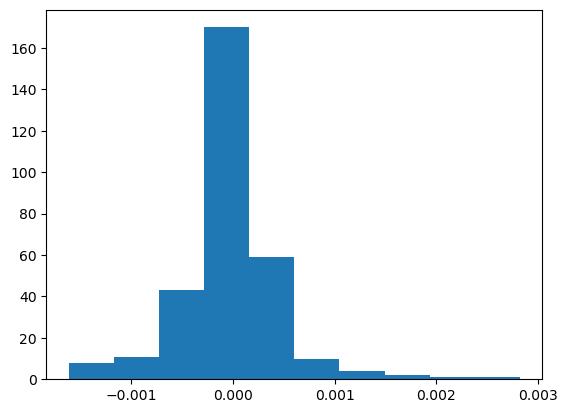

In [11]:
plt.hist(VaR_AA['returns'])
plt.show()

In [12]:
# Shapiro-Wilk Test: Normality

from scipy.stats import shapiro

# Assuming 'data' is the column of interest in your DataFrame
p_value = shapiro(VaR_AA['returns'])[1]

# Check if p-value is less than a significance level (e.g., 0.05)
if p_value < 0.05:
    print("The data is not normally distributed.")
else:
    print("The data is normally distributed.")

The data is normally distributed.


#  Montecarlo Simulation

In [18]:
num_simulations = 10000

In [19]:
for horizon in time_horizons:
    returns = VaR_AA['returns']
    last_price = last_price_VaR

    # Generate simulated price paths
    simulations = np.random.normal(returns.mean(), returns.std(), (horizon, num_simulations))
    simulated_prices = last_price * np.exp(simulations.cumsum(axis=0))

    # Calculate the portfolio returns for each simulation
    portfolio_returns = simulated_prices[-1] / last_price - 1
    
    
    # Convert portfolio_returns to a pandas Series
    portfolio_returns = pd.Series(portfolio_returns)

    # Calculate VaR using quantile
    var = portfolio_returns.quantile(1 - confidence_level)

    print(f"VaR for {horizon} days: {var}")

VaR for 1 days: -0.000760150610134141
VaR for 7 days: -0.001903612203163696
VaR for 15 days: -0.002667102317837322
VaR for 30 days: -0.003528841353334621
VaR for 60 days: -0.004324323648359833
VaR for 90 days: -0.005162146440324404
VaR for 180 days: -0.005974880585449926
